<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 24 **
** ┗ Hotel reservation demand analysis **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Analysis of Month Reservation Demand」
* 🥈SESSION 2 -「Cancel Customer, Noh Show Customer Analysis」
* 🥇SESSION 3 -「Cancel ML Use/No Show Customer Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/24_Hotel Booking Demand Analysis')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/24_Hotel Booking Demand Analysis'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🏨🔖 (Reservation Manager (Team)

``
A Hotel is suffering from the aftermath of the corona these days.The biggest problem is that the number of customers and cancellation customers is increasing in the yard where the number of room reservations are also decreasing.
Cancel customers are glad, but in the case of No -Show customers, they are likely to blow their rooms for a day, which has a big impact on costly problems.So Noh Show
We will predict the cancellation customer in advance and adjust the operating cost according to the situation.

``


> ** Looking at the data **

* Hotel reservation data
* Data specification ⬇

| Hotel | IS_CANCELED | Lead_Time | Arrival_date_year | Arrival_date_month |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Hotel name | Cancellation | Until the entrance of the room | Year | Month | Day | Day |
| Arrival_date_day_of_month | Stays_in_weekend_nights | Stays_in_Week_nights | Adults | Children | Babies |
| Weekend | Whether or not you are on weekdays | Adults | Children | Infants |
| Meal | COUNTRY | Market_seGment | Distribution_channel | Is_repeathed_guest | Previus_cancellations |
| Meal | Country | Reservation Distribution Channel Tax | Reservation Distribution Channel | Existing customers | Past cancellation number |
| Previus_Bookings_not_canceled | Reserved_room_type | Assigned_room_type | Booking_Changes | deposit_type | Agent |
| Past reservations that have not been canceled in the past | Reservation Room Type | Assigned Room Type | Number of reservations | Guarantee | | Travel Agency ID |
| Company | Days_in_WAITING_LIST | Customer_type | ADR | required_car_parking_spaceS | Total_OF_SPECIAL_REQUESTS |
| Reservation Payment Company | Number of days on the waiting list | Contract type | Average room cost | required parking number | Special Requests |
| Reservation_status | Reservation_status_date |
| Reservation status | Reservation status update date |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter24_hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Reduction of operating profit due to the increase in the increase in customer/cancellation customer
``

> ** Expected effect **

``
▶ No show/cancellation of customer loss cost reduction, increase in operating profit
``

> ** Solution **

``
▶ Forecasting customers and adjusting operating cost
▶ Session 1 🥉
-DATA pretreatment and room demand
▶ Session 2 🥈
-Canction and the current status of no -show ratio and cancellation of customer characteristics/analysis
▶ Session 3 🥇
-Cancelment/No -show customer prediction using ML algorithms
``

> ** Performance measurement **

``
▶ Model Use No Show/Cancel Customer Management before/after loss cost comparison
``

> ** Public application **

``
▶ Create data Mart for input to Model
▶ Use of predictive model/cancellation customer extraction
▶ Preparation to replace other reservation guests for rooms that are highly likely to be canceled.
``

> ** Main code preview **

``
▶ Session 1 → Fillna (0), Replace, SNS.BARPLOT (order = [''])
▶ Session 2 → np.where, catplot, groupby.agg ()
▶ Session 3 → RandomForestClassifier (), Labelencoder (), ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Monthly reservation demand analysis **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 119,390 row, 32 COL
print('df', df.shape)

df (119390, 32)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# ▶ Outlier verification
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# ▶ Fill in without decoping that can be interpreted as 0 or none.
df['children'].fillna(0, inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [ ]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# ▶ Remove negative values
df=df[df['adr']>0]

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.00000,117430.000000,117430.000000,117430.000000,117430.000000
mean,0.374785,105.084340,2016.160274,27.136779,15.802819,0.936422,2.521221,1.860632,0.104505,0.007869,0.027872,0.086954,0.125334,0.216486,75.177348,10.54716,2.337937,103.530818,0.062642,0.571038
std,0.484069,106.907012,0.706565,13.575680,8.783582,0.995760,1.893742,0.482102,0.399690,0.097168,0.164607,0.848690,1.446204,0.633188,107.235820,53.54574,17.677053,49.198721,0.245565,0.791655
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.00000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.00000,391.000000,5400.000000,8.000000,5.000000


### · Find out the demand for rooms
---


In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [ ]:
# ▶ Status of reservations for rooms for each year
df['arrival_date_year'].value_counts()

,count
arrival_date_year,
2016,55789
2017,40231
2015,21410


In [ ]:
# ▶ Monthly room reservation status
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,13711
July,12491
May,11611
April,10953
October,10929
June,10819
September,10351
March,9641
February,7921


In [ ]:
# ▶ Status of use of rooms by year, monthly
df_reservation = pd.DataFrame(df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['hotel'].count())
df_reservation.head(10)

,arrival_date_year,arrival_date_month,hotel
0,2015,August,3794
1,2015,December,2795
2,2015,July,2714
3,2015,November,2274
4,2015,October,4824
5,2015,September,5009
6,2016,April,5346
7,2016,August,5020
8,2016,December,3766
9,2016,February,3820


In [ ]:
# ▶ Use the replace function to make monthly data finances
df_reservation = df_reservation.replace({'January' : '01.January',
                                         'February' : '02.February',
                                         'March' : '03.March',
                                         'April' : '04.April',
                                         'May' : '05.May',
                                         'June' : '06.June',
                                         'July' : '07.July',
                                         'August' : '08.August',
                                         'September' : '09.September',
                                         'October' : '10.October',
                                         'November' : '11.November',
                                         'December' : '12.December'})
df_reservation.head(5)

,arrival_date_year,arrival_date_month,hotel
0,2015,08.August,3794
1,2015,12.December,2795
2,2015,07.July,2714
3,2015,11.November,2274
4,2015,10.October,4824


In [ ]:
# ▶ Sorting, 2015 data existed from July, 2016 in all 12 months, and only from January to August 2017
# ▶ difficult to Plotting
df_reservation = df_reservation.sort_values(by=['arrival_date_year','arrival_date_month'])
df_reservation

,arrival_date_year,arrival_date_month,hotel
2,2015,07.July,2714
0,2015,08.August,3794
5,2015,09.September,5009
4,2015,10.October,4824
3,2015,11.November,2274
1,2015,12.December,2795
10,2016,01.January,2183
9,2016,02.February,3820
13,2016,03.March,4739
6,2016,04.April,5346


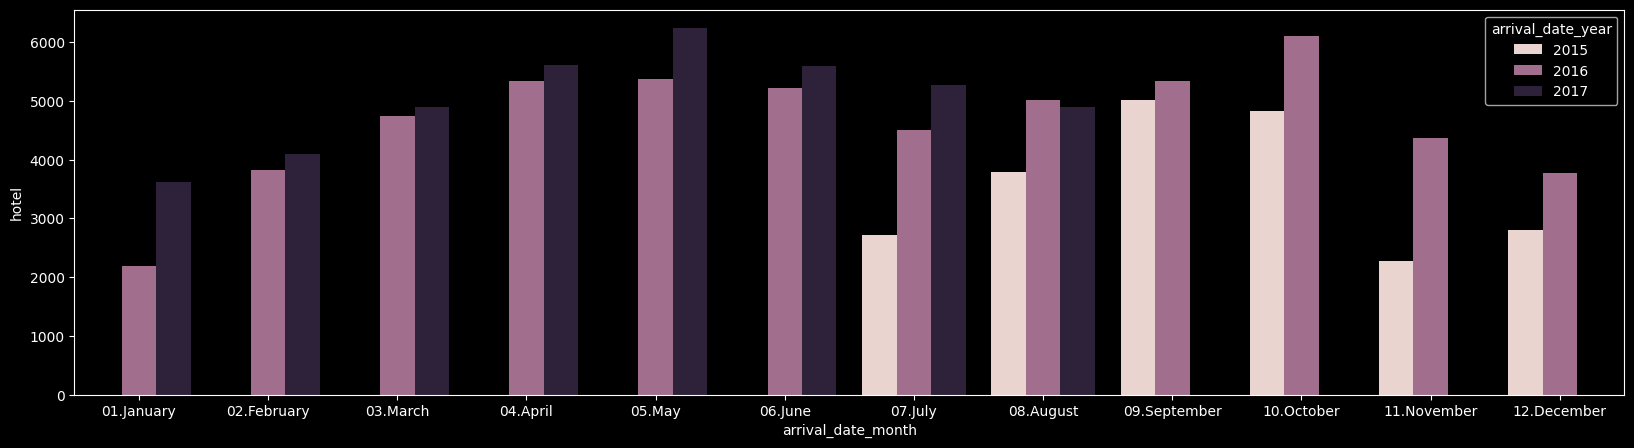

In [ ]:
# ▶ Readability Up using Barplot, Order options
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.barplot(x='arrival_date_month', y='hotel', hue='arrival_date_year', data = df_reservation,
            order = ['01.January', '02.February', '03.March', '04.April', '05.May', '06.June', '07.July', '08.August', '09.September', '10.October', '11.November', '12.December']);
plt.gcf().set_size_inches(20, 5);

## ** 🥈Session 2 **
** ┗ Cancel customer, Nohsho customer analysis **
---


### · Cancellation and no show ratio
---



In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [ ]:
df['reservation_status'].value_counts()

,count
reservation_status,
Check-Out,73419
Canceled,42830
No-Show,1181


In [ ]:
# ▶ Cancel ratio
print('Canceled :', 42830 / (73419 + 42830 + 1181))


# ▶ Noh Show Ratio
print('No-Show :', 1181 / (73419 + 42830 + 1181))

Canceled : 0.36472792301796814
No-Show : 0.010057055266967554


In [ ]:
# ▶ Change to Data 1 for Cancelo Show
import numpy as np
df['reservation_status'] = np.where(df['reservation_status'] != 'Check-Out', 1, 0)
df['reservation_status'].value_counts()

,count
reservation_status,
0,73419
1,44011


In [ ]:
44011 / (73419 +44011)

0.37478497828493573

### · Cancellation and Noh Show Customer Characteristics Analysis
---


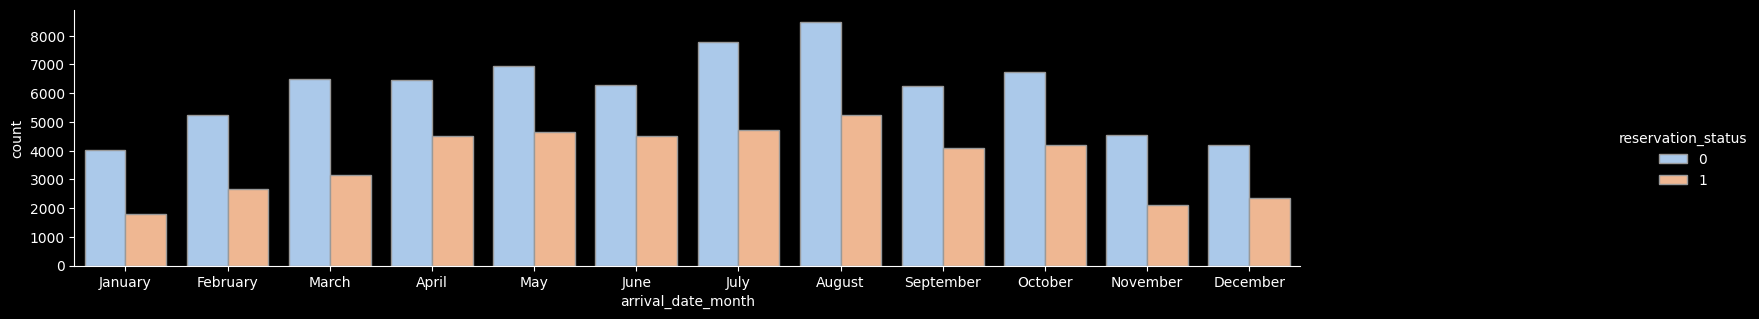

In [ ]:
# ▶ Comparison of cancellation/no show rate according to month
sns.catplot(x="arrival_date_month", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df,
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
plt.gcf().set_size_inches(20, 3)

In [ ]:
# ▶ Comparison of cancellation/no show rate according to month
df_gp = df.groupby('arrival_date_month')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
arrival_date_month,,,
June,10819,4523,41.8
April,10953,4504,41.1
May,11611,4659,40.1
September,10351,4092,39.5
October,10929,4209,38.5
August,13711,5228,38.1
July,12491,4723,37.8
December,6561,2355,35.9
February,7921,2676,33.8


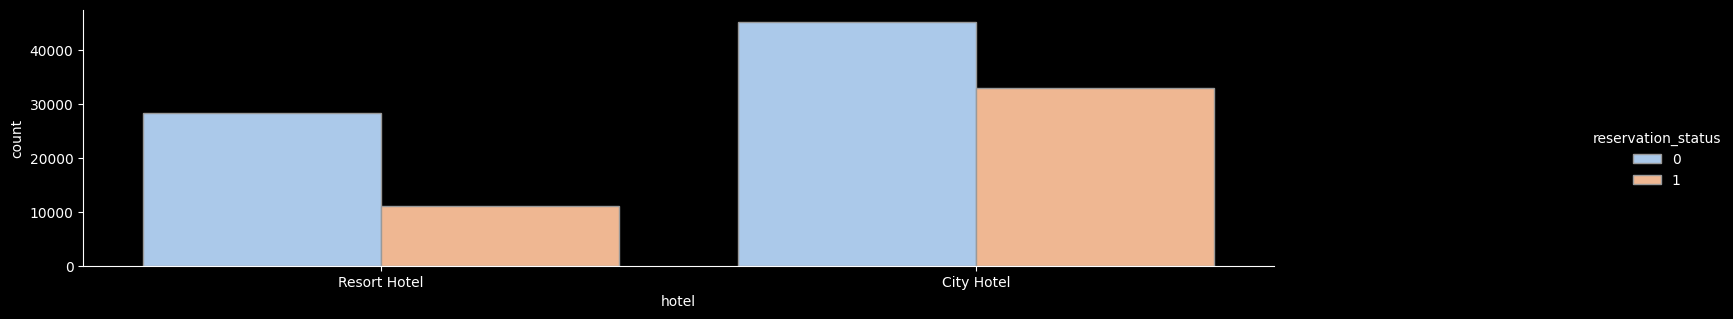

In [ ]:
# ▶ Resort Hottel and City Hotel Comparison
sns.catplot(x="hotel", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [ ]:
# ▶ Resort Hotel and CityHotel Comparison
df_gp = df.groupby('hotel')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
hotel,,,
City Hotel,78122,32973,42.2
Resort Hotel,39308,11038,28.1


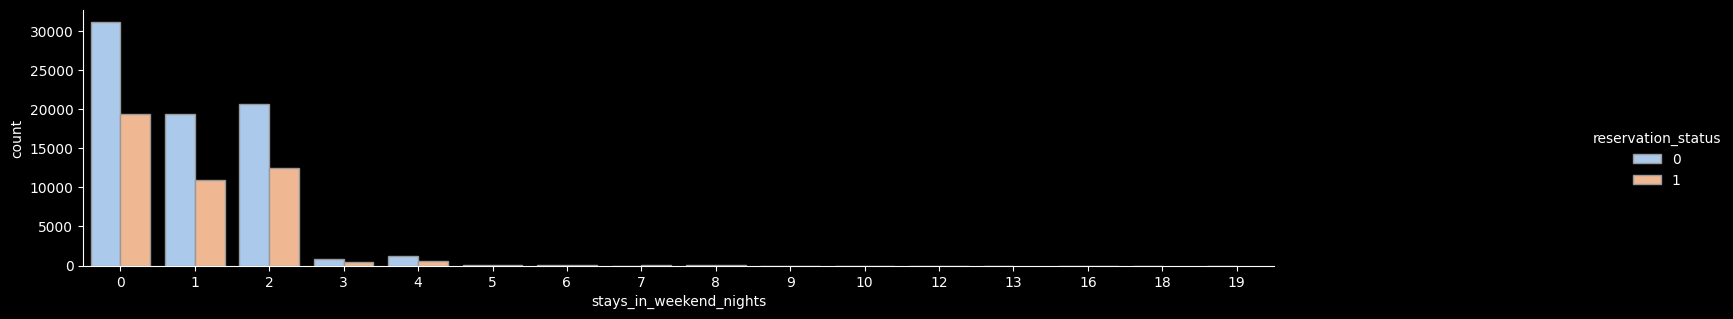

In [ ]:
# ▶ Comparison according to the number of weekend reservations
sns.catplot(x="stays_in_weekend_nights", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [ ]:
# ▶ Comparison according to the number of weekend reservations
df_gp = df.groupby('stays_in_weekend_nights')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
stays_in_weekend_nights,,,
9,9,7,77.8
7,19,14,73.7
8,57,34,59.6
6,152,87,57.2
5,77,43,55.8
0,50499,19361,38.3
2,33150,12453,37.6
1,30361,10967,36.1
3,1244,444,35.7


In [ ]:
# ▶ Comparison according to the number of weekend reservations (Re-binning)
df_c = df.copy()

df_c['gp'] = np.where(df_c['stays_in_weekend_nights'] <= 2, 1,
                      np.where(df_c['stays_in_weekend_nights'] <= 8, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,27,11,40.7
1,114010,42781,37.5
2,3393,1219,35.9


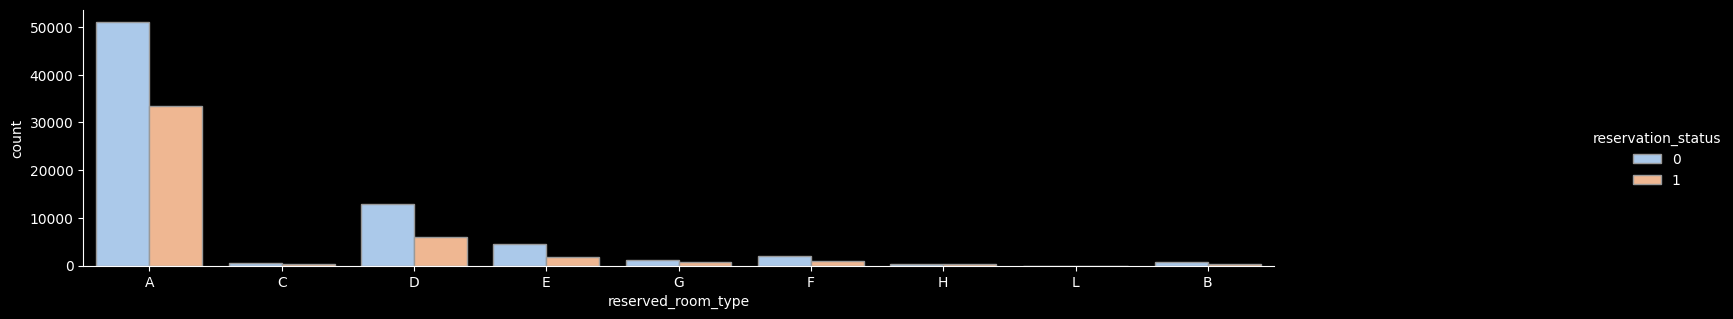

In [ ]:
# ▶ Comparison according to room type
sns.catplot(x="reserved_room_type", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [ ]:
# ▶ Comparison according to room type
df_gp = df.groupby('reserved_room_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
reserved_room_type,,,
H,595,245,41.2
A,84573,33477,39.6
G,2006,756,37.7
B,1085,365,33.6
C,913,306,33.5
L,6,2,33.3
D,19005,6086,32.0
F,2824,873,30.9
E,6423,1901,29.6


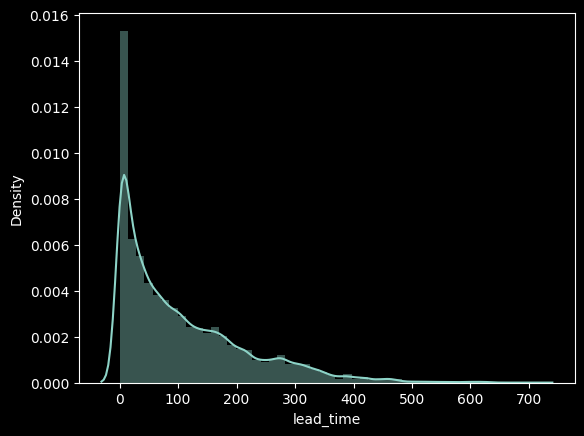

In [ ]:
# ▶ lead time
sns.distplot(df['lead_time']);

In [ ]:
# ▶ Lead Time section
df_c = df.copy()
df_c['gp'] = np.where(df['lead_time'] <= 100, 1,
                       np.where(df['lead_time']<=200, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,20526,12182,59.3
2,26586,11987,45.1
1,70318,19842,28.2


## ** 🥇Session 3 **
** ┗ ML Use Cancel/No Show Customer Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']
numeric_list : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['is_canceled', 'reservation_status_date', 'reservation_status'], axis=1)
Y=df['reservation_status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(82201, 29)
(82201,)
(35229, 29)
(35229,)


In [ ]:
categoical_list.remove('reservation_status_date')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type


In [ ]:
x_test[categoical_list].head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
13158,1,1,0,135,3,1,0,0,0,2
63026,0,4,0,135,6,3,0,0,0,2
111103,0,0,0,54,6,3,3,3,0,2
29132,1,4,0,135,3,3,0,0,0,2
63014,0,4,0,135,4,3,0,0,1,2


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     51393
           1       0.97      0.42      0.59     30808

    accuracy                           0.78     82201
   macro avg       0.86      0.71      0.72     82201
weighted avg       0.83      0.78      0.75     82201

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     22026
           1       0.97      0.42      0.59     13203

    accuracy                           0.78     35229
   macro avg       0.86      0.71      0.72     35229
weighted avg       0.83      0.78      0.75     35229



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,29449
1,5780


In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9101699638843437
roc_score_test : 0.9113161719689012


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

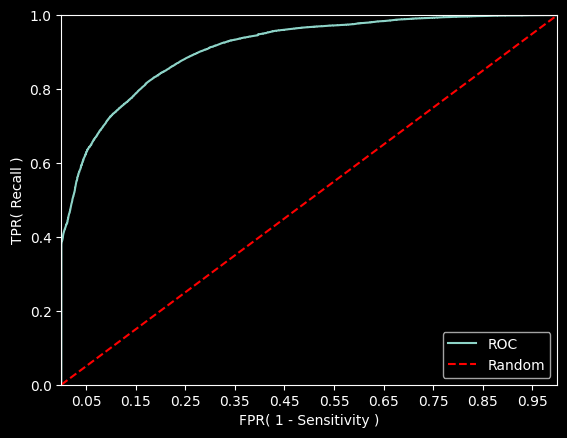

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

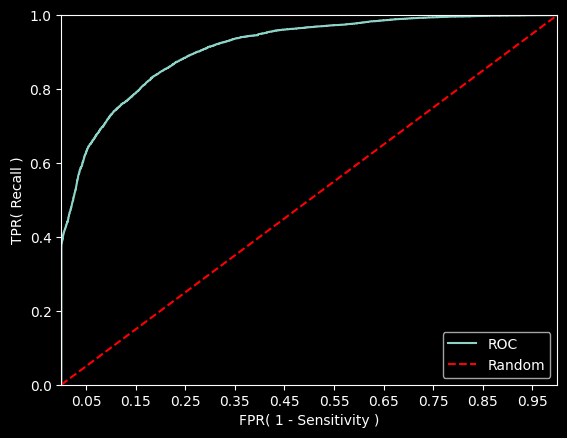

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


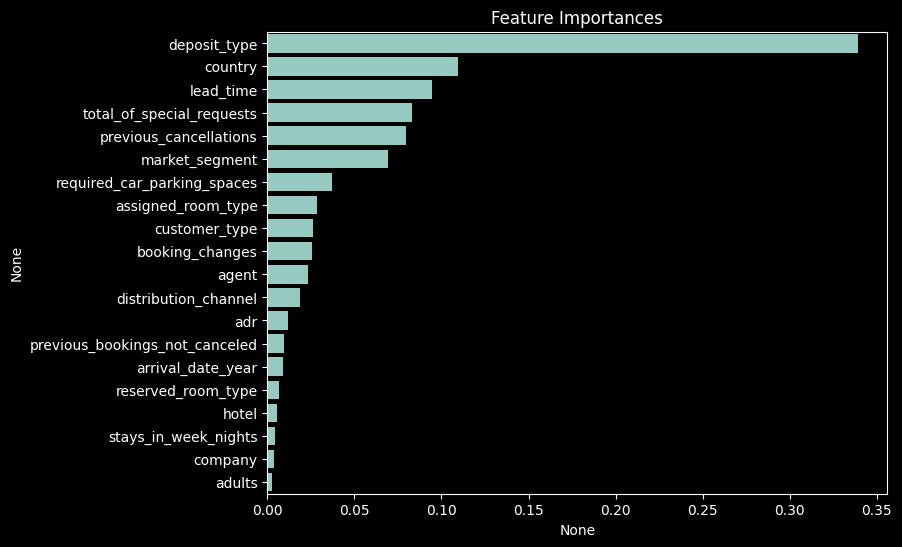

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

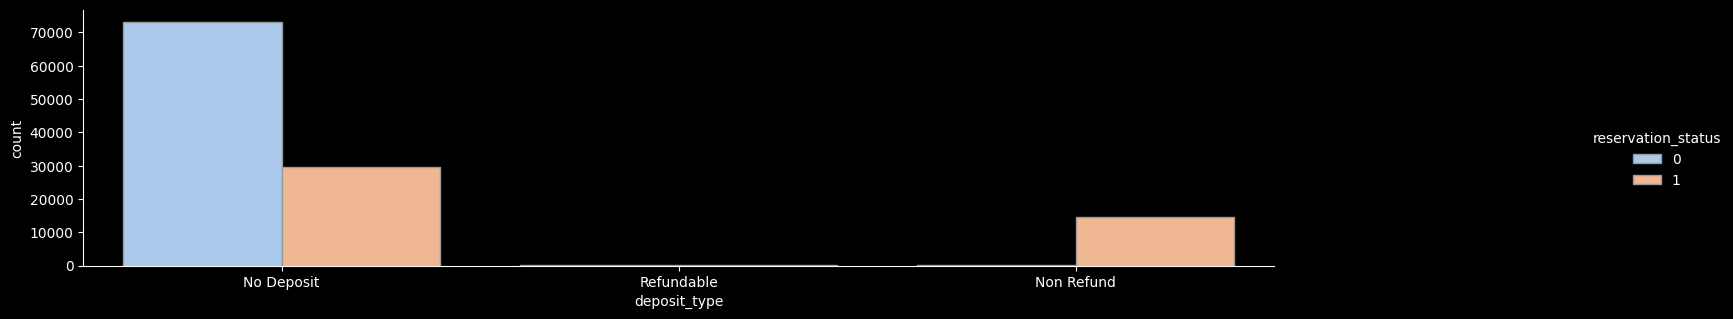

In [ ]:
# ▶ Candidate No. 1 variable search
sns.catplot(x="deposit_type", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [ ]:
# ▶ Comparison of cancellation/no show rate according to month
# ▶ Even a refund is not possible, but the cancellation rate is high
df_gp = df.groupby('deposit_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
deposit_type,,,
Non Refund,14587,14494,99.4
No Deposit,102681,29481,28.7
Refundable,162,36,22.2


In [ ]:
# ▶ Country
df_gp = df.groupby('country')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp[df_gp['count'] > 2000]

,count,sum,ratio
country,,,
PRT,47040,27332,58.1
BRA,2211,829,37.5
ITA,3749,1332,35.5
ESP,8489,2176,25.6
IRL,3369,832,24.7
USA,2086,500,24.0
GBR,12055,2451,20.3
BEL,2334,472,20.2
FRA,10360,1932,18.6


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# ▶ total_of_special_requests
df_gp = df.groupby('total_of_special_requests')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
total_of_special_requests,,,
0,69140,33404,48.3
2,12763,2849,22.3
1,32727,7279,22.2
3,2436,442,18.1
4,324,35,10.8
5,40,2,5.0



### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)

In [ ]:
# April cancellation/when assuming to predict No -Show customers
# As of March 31, Data Mart is created
Data_mart_3월마감 = pd.read_csv("chapter24_hotel_bookings.csv")

In [ ]:
# Now predict using the processed data
pred = clf_from_pickle.predict(Data_mart_3월마감)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- is_canceled
- reservation_status
- reservation_status_date


In [ ]:
# Predict Data March Data MART Data Data Extracting for No Show/Canceling (1)
Data_mart_3월마감['Y'] = pred
Data_mart_3월마감[Data_mart_3월마감['Y']==1]

NameError: name 'pred' is not defined